### Perimeter Institute Nov 28rd
### 2018 computational physics course
# Exact Diagonalization
 
Guifre Vidal  

# IJulia nb5: sparse diagonalization

In [4]:
using PyPlot
using LinearAlgebra
using Arpack

In [5]:
# Ising model
function buildIsing(theta=pi/4) # Ising model with transverse magnetic field h (critical theta=pi/4 by default)
    X = [0. 1; 1 0]
    Z = [1. 0; 0 -1]
    E = diagm(0=>ones(2))
    XX = kron(X,X)
    HXX = XX
    HZ = kron(Z,E) + kron(E,Z)
    H2 = -(cos(theta)*XX + sin(theta)/2*HZ)
    return H2
end

H2 = buildIsing(pi/4)

4×4 Array{Float64,2}:
 -0.707107  -0.0       -0.0       -0.707107
 -0.0       -0.0       -0.707107  -0.0     
 -0.0       -0.707107  -0.0       -0.0     
 -0.707107  -0.0       -0.0        0.707107

In [6]:
#Let us have a look at the spectrum of H2

theta = pi/4 # critical magnetic field
H2 = buildIsing(theta) # Hamiltonian
D,U = eigen(H2)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
4-element Array{Float64,1}:
 -0.9999999999999993
 -0.7071067811865469
  0.7071067811865476
  1.0               
eigenvectors:
4×4 Array{Float64,2}:
 0.92388    0.0        0.0       -0.382683
 0.0       -0.707107   0.707107   0.0     
 0.0       -0.707107  -0.707107   0.0     
 0.382683   0.0        0.0        0.92388 

In [7]:
# Let us shift the spectrum of H2 so that all eigenvalues are negative 

shiftE = D[end] 
H2 = H2 - shiftE*diagm(0=>ones(4)) # remember to re-shift the energy later on!
D,U = eigen(H2)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
4-element Array{Float64,1}:
 -1.9999999999999993    
 -1.707106781186547     
 -0.2928932188134524    
 -8.836921296448426e-309
eigenvectors:
4×4 Array{Float64,2}:
 -0.92388    0.0        0.0       -0.382683
  0.0       -0.707107   0.707107   0.0     
  0.0       -0.707107  -0.707107   0.0     
 -0.382683   0.0        0.0        0.92388 

### Sparse multiplication

In [8]:
# function for sparse multiplication

function multiplyHPsi(Psi, H2) 
    L = length(Psi)  # Dimension of the vector space
    N = convert(Int64,log2(L))  # Number of spins
    HPsi = zeros(L)
    for n=1:N                              # This multiplies by the Hamiltonian H
        Psi = reshape(Psi,(4,2^(N-2)))
        HPsi = reshape(HPsi,(4,2^(N-2)))
        HPsi += H2*Psi                 
        Psi = reshape(Psi,(2,2^(N-1)))
        HPsi = reshape(HPsi,(2,2^(N-1)))
        Psi = permutedims(Psi,(2,1))
        HPsi = permutedims(HPsi,(2,1))
    end
    Psi = reshape(Psi,L)
    HPsi = reshape(HPsi, L)
    return HPsi
end

multiplyHPsi (generic function with 1 method)

### Initialize Psi for N spins

In [12]:
N=18 #  N = 20    t < 0.5s 
Psi = randn(2^N)

# Normalize Psi
Psi = Psi/sqrt(abs(Psi'*Psi))

@time multiplyHPsi(Psi,H2)

init_steps = 1
energy = ones(0)
initial_step=1
Nsteps = 0
;

  0.086269 seconds (298 allocations: 146.012 MiB, 19.30% gc time)


### Apply power method to Psi

In [13]:
# Use this to start or continue to apply power method 

initial_step += Nsteps
Nsteps = 300
final_step = initial_step + Nsteps-1

for n=initial_step:final_step
    HPsi = multiplyHPsi(Psi,H2)
    newenergy = real(Psi'*HPsi) + shiftE*N
    energy = [energy; newenergy]
    Psi = HPsi/sqrt(abs(HPsi'*HPsi))
    print(n-initial_step+1, ":", Nsteps, " ")
end

bestenergy_ground = energy[end]

1:300 2:300 3:300 4:300 5:300 6:300 7:300 8:300 9:300 10:300 11:300 12:300 13:300 14:300 15:300 16:300 17:300 18:300 19:300 20:300 21:300 22:300 23:300 24:300 25:300 26:300 27:300 28:300 29:300 30:300 31:300 32:300 33:300 34:300 35:300 36:300 37:300 38:300 39:300 40:300 41:300 42:300 43:300 44:300 45:300 46:300 47:300 48:300 49:300 50:300 51:300 52:300 53:300 54:300 55:300 56:300 57:300 58:300 59:300 60:300 61:300 62:300 63:300 64:300 65:300 66:300 67:300 68:300 69:300 70:300 71:300 72:300 73:300 74:300 75:300 76:300 77:300 78:300 79:300 80:300 81:300 82:300 83:300 84:300 85:300 86:300 87:300 88:300 89:300 90:300 91:300 92:300 93:300 94:300 95:300 96:300 97:300 98:300 99:300 100:300 101:300 102:300 103:300 104:300 105:300 106:300 107:300 108:300 109:300 110:300 111:300 112:300 113:300 114:300 115:300 116:300 117:300 118:300 119:300 120:300 121:300 122:300 123:300 124:300 125:300 126:300 127:300 128:300 129:300 130:300 131:300 132:300 133:300 134:300 135:300 136:300 137:300 138:300 139:

-16.211961869491844

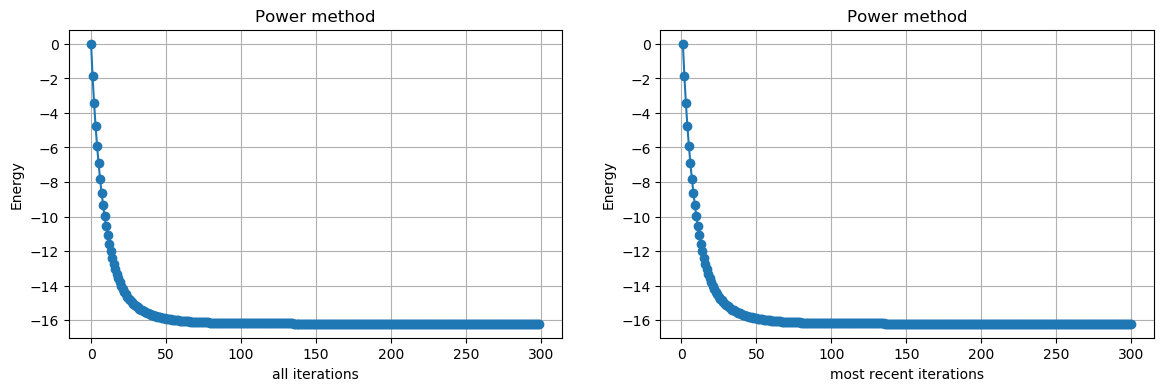

In [14]:
figure("Power_method",figsize=(14,4))

subplot(121) # Create the 1st axis of a 2x2 arrax of axes
grid("on") # Create a grid on the axis
title("Power method")
ax = gca()
xlabel("all iterations")
ylabel("Energy")
plot(energy, marker = "o")

subplot(122) # Create the 1st axis of a 2x2 arrax of axes
grid("on") # Create a grid on the axis
title("Power method")
ax = gca()
xlabel("most recent iterations")
ylabel("Energy")
plot(initial_step:final_step, energy[initial_step:final_step], marker = "o");

### Exercise (1/2): For $N=20$ spins, compute the lowest energy with momentum $k=n 2\pi/N$ for $n=0,2, \cdots, N-1$

In [15]:
function normalizeVec(Vec)
    Vec = Vec/sqrt(abs(Vec'*Vec)) 
end

function give_momentum(Psi, k)
    L = length(Psi)  # Dimension of the vector space
    N = convert(Int64,log2(L))  # Number of spins
    newPsi = zeros(L);
    for n in 1:N
        newPsi += Psi*exp(im*k*n*2pi/N)
        newPsi = reshape(newPsi, (2,2^(N-1)))
        newPsi = permutedims(newPsi, (2,1))
        newPsi = reshape(newPsi, (2^N))
    end
    return normalizeVec(newPsi)
end

function compute_momentum(Psi)
    L = length(Psi)  # Dimension of the vector space
    N = convert(Int64,log2(L))  # Number of spins
    TPsi = zeros(L)
    TPsi = reshape(Psi, (2,2^(N-1)))
    TPsi = permutedims(TPsi, (2,1))
    TPsi = reshape(TPsi, (2^N))
    scalarp = Psi'*TPsi
    return angle(scalarp)/(2pi)*N
end


compute_momentum (generic function with 1 method)

In [16]:
# testing give_momentum and compute_momentum
q = zeros(N)
for n in 1:N
    print(n,":", N, " ")
    Q = give_momentum(randn(2^N)+im*randn(2^N), n)
    q[n] = compute_momentum(Q)
end
q

1:18 2:18 3:18 4:18 5:18 6:18 7:18 8:18 9:18 10:18 11:18 12:18 13:18 14:18 15:18 16:18 17:18 18:18 

18-element Array{Float64,1}:
  1.0000000000000038   
  2.0000000000000018   
  3.0000000000000044   
  4.000000000000001    
  4.999999999999999    
  5.999999999999998    
  6.9999999999999964   
  8.000000000000002    
 -9.0                  
 -7.999999999999997    
 -7.000000000000002    
 -6.0                  
 -5.000000000000002    
 -4.000000000000001    
 -2.999999999999999    
 -2.000000000000002    
 -1.0000000000000016   
 -3.975693351829399e-17

In [17]:
N=18 #  N = 20    t < 0.5s 

k = 1 # momentum k=0,1,...,N-1
Psik = give_momentum(randn(2^N)+im*randn(2^N), k) # normalized random vector with momentum k

@time multiplyHPsi(Psik,H2)

init_steps = 1
energy = ones(0)
initial_step=1
Nsteps = 0
;

  0.638405 seconds (1.53 M allocations: 361.761 MiB, 17.40% gc time)


In [21]:
initial_step += Nsteps
Nsteps = 300
final_step = initial_step + Nsteps-1

for n=initial_step:final_step
    HPsik = multiplyHPsi(Psik,H2)
    newenergy = real(Psik'*HPsik) + shiftE*N
    energy = [energy; newenergy]
    Psik = normalizeVec(HPsik)
    print(n-initial_step+1, ":", Nsteps, " ")
end

bestenergy_k = energy[end]

1:300 2:300 3:300 4:300 5:300 6:300 7:300 8:300 9:300 10:300 11:300 12:300 13:300 14:300 15:300 16:300 17:300 18:300 19:300 20:300 21:300 22:300 23:300 24:300 25:300 26:300 27:300 28:300 29:300 30:300 31:300 32:300 33:300 34:300 35:300 36:300 37:300 38:300 39:300 40:300 41:300 42:300 43:300 44:300 45:300 46:300 47:300 48:300 49:300 50:300 51:300 52:300 53:300 54:300 55:300 56:300 57:300 58:300 59:300 60:300 61:300 62:300 63:300 64:300 65:300 66:300 67:300 68:300 69:300 70:300 71:300 72:300 73:300 74:300 75:300 76:300 77:300 78:300 79:300 80:300 81:300 82:300 83:300 84:300 85:300 86:300 87:300 88:300 89:300 90:300 91:300 92:300 93:300 94:300 95:300 96:300 97:300 98:300 99:300 100:300 101:300 102:300 103:300 104:300 105:300 106:300 107:300 108:300 109:300 110:300 111:300 112:300 113:300 114:300 115:300 116:300 117:300 118:300 119:300 120:300 121:300 122:300 123:300 124:300 125:300 126:300 127:300 128:300 129:300 130:300 131:300 132:300 133:300 134:300 135:300 136:300 137:300 138:300 139:

-15.673233316134002

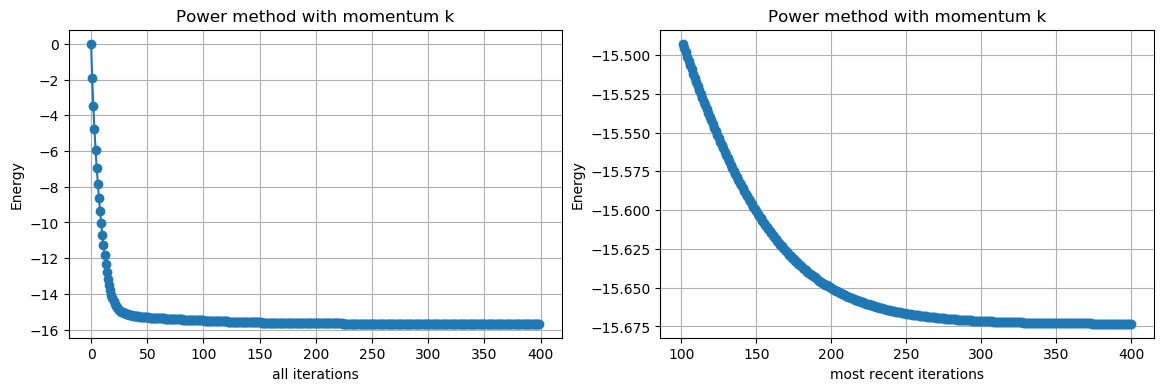

In [22]:
figure("Power_method",figsize=(14,4))

subplot(121) # Create the 1st axis of a 2x2 arrax of axes
grid("on") # Create a grid on the axis
title("Power method with momentum k")
ax = gca()
xlabel("all iterations")
ylabel("Energy")
plot(energy, marker = "o")

subplot(122) # Create the 1st axis of a 2x2 arrax of axes
grid("on") # Create a grid on the axis
title("Power method with momentum k")
ax = gca()
xlabel("most recent iterations")
ylabel("Energy")
plot(initial_step:final_step, energy[initial_step:final_step], marker = "o");

In [23]:
[bestenergy_ground bestenergy_k]

1×2 Array{Float64,2}:
 -16.212  -15.6732

### Exercise (1/2): For $N=20$ spins, compute first excited state with momentum $k=0$ 

In [24]:
function make_orthogonal(Excited,Ground) # it assumes Ground is normalized, that is Ground'*Ground = 1
    Excited = Excited - Ground *(Ground'*Excited)
    normalizeVec(Excited)
end

Ground = randn(2^N) + im*rand(2^N)
Ground = normalize(Ground)
Excited = rand(2^N) + im*rand(2^N)
Excited = normalizeVec(Excited)

display(Excited'*Ground)
Excited2 = make_orthogonal(Excited,Ground)
display(Excited2'*Ground)

0.26346497919392153 + 0.26536685552068107im

1.609823385706477e-15 - 8.326672684688674e-17im

### Note 1: Another possible application is the simulation of time evolution $|\Psi(t)\rangle \equiv \exp (-i t H) |\Psi(0)\rangle$, 
### using $|\Psi(t+\delta t)\rangle = |\Psi(t)\rangle - i \delta t H |\Psi(t)\rangle$

### Note 2: We can use eigs with linear maps (last night I did not get it to work with julia 1.0, sorry!)

In [ ]:
# using LinearMaps